In [5]:
import os
import google.generativeai as genai
from dotenv import load_dotenv
from tabulate import tabulate


In [6]:
# API anahtarını yükle
load_dotenv()
genai.configure(api_key=os.getenv('GOOGLE_API_KEY'))

In [7]:

# Test metni
text = "Başta güzel gibiydi ama zamanla hayal kırıklığına dönüştü."

# 5 Farklı prompt formatı için şablonlar
# Metin Sınıflandırma
PROMPTS = {
    "metin_siniflandirma": {
        "zero_shot": 'Bu cümlenin duygusunu analiz et: "{text}"\nCevap sadece "Olumlu", "Olumsuz" veya "Nötr" olmalı.',
        "one_shot": '''Örnek:\n Cümle: "Bu ürünü çok beğendim!"\nDuygu: Olumlu\n\nŞimdi analiz et:\nCümle: "{text}"\nDuygu:''',
        "few_shot": '''Örnekler:\n Cümle: "Film çok kötüydü."\nDuygu: Olumsuz\nCümle: "Tatilde çok eğlendik."\nDuygu: Olumlu\n\nAnaliz et:\nCümle: "{text}"\nDuygu:''',
        "cot": '''Cümleyi analiz et: "{text}"\nÖnce duygusal kelimeleri bul, sonra bu ifadelerin tonunu değerlendir.\nSonuç: ''',
        "instructional": 'Aşağıdaki cümleye bakarak duygusal tonunu sınıflandır. Sadece "Olumlu", "Olumsuz" veya "Nötr".\nCümle: "{text}"'
    }
}

def ask_gemini(prompt):
    model = genai.GenerativeModel('gemini-2.5-flash')
    try:
        response = model.generate_content(prompt)
        return response.text.strip()
    except Exception as e:
        return f"[HATA] {str(e)}"

def test_all_prompts(text):
    results = []
    for format_adi, prompt_sablonu in PROMPTS["metin_siniflandirma"].items():
        filled_prompt = prompt_sablonu.format(text=text)
        yanit = ask_gemini(filled_prompt)
        results.append([format_adi, filled_prompt.strip(), yanit])

    print("\n📊 Test Sonuçları:")
    print(tabulate(results, headers=["Prompt Tipi", "Gönderilen Prompt", "Gemini Yanıtı"], tablefmt="fancy_grid", maxcolwidths=[12, 50, 50]))

# Kodun çalıştırıldığı yer
if __name__ == "__main__":
    test_all_prompts(text)



📊 Test Sonuçları:
╒═══════════════╤════════════════════════════════════════════════════╤════════════════════════════════════════════════════╕
│ Prompt Tipi   │ Gönderilen Prompt                                  │ Gemini Yanıtı                                      │
╞═══════════════╪════════════════════════════════════════════════════╪════════════════════════════════════════════════════╡
│ zero_shot     │ Bu cümlenin duygusunu analiz et: "Başta güzel      │ Olumsuz                                            │
│               │ gibiydi ama zamanla hayal kırıklığına dönüştü."    │                                                    │
│               │ Cevap sadece "Olumlu", "Olumsuz" veya "Nötr"       │                                                    │
│               │ olmalı.                                            │                                                    │
├───────────────┼────────────────────────────────────────────────────┼───────────────────────────────────────────

In [8]:

# Sabit test metni
text = "Ahmet, Ankara'da Microsoft ile buluştu."

# PROMPT ŞABLONLARI
PROMPTS = {
    "bilgi_cikarma": {
        "zero_shot": 'Aşağıdaki cümleden kişi, yer ve organizasyon isimlerini çıkar:\n"{text}"',
        "one_shot": '''Örnek metin: "Ali İstanbul’da IBM ile toplantı yaptı."\nÇıkarılan Bilgiler: Kişi: Ali, Yer: İstanbul, Organizasyon: IBM\n\nŞimdi analiz et:\nMetin: "{text}"''',
        "few_shot": '''Metin: "Ayşe Ankara’da Google'da işe başladı."\nÇıkarılan: Kişi: Ayşe, Yer: Ankara, Organizasyon: Google\n\nMetin: "{text}"\nÇıkarılan:''',
        "cot": '''Cümleyi parçalara ayır ve özel isimleri tanımla.\nMetin: "{text}"\nAdım adım düşün ve en sonunda doğru formatta kişi, yer, kurumları belirt. Doğru format: Kişi: [Kişi Adı], Yer: [Yer Adı], Organizasyon: [Organizasyon Adı]''',
        "instructional": 'Aşağıdaki metindeki kişi, yer ve organizasyon isimlerini listele.\nMetin: "{text}"'
    }
}

def ask_gemini(prompt):
    model = genai.GenerativeModel('gemini-2.5-flash')
    try:
        response = model.generate_content(prompt)
        return response.text.strip()
    except Exception as e:
        return f"[HATA] {str(e)}"

def test_all_prompts(text):
    results = []
    for format_adi, prompt_sablonu in PROMPTS["bilgi_cikarma"].items():
        filled_prompt = prompt_sablonu.format(text=text)
        yanit = ask_gemini(filled_prompt)
        results.append([format_adi, filled_prompt.strip(), yanit])

    print("\n📊 Test Sonuçları:")
    print(tabulate(results, headers=["Prompt Tipi", "Gönderilen Prompt", "Gemini Yanıtı"], tablefmt="fancy_grid", maxcolwidths=[12, 50, 50]))


test_all_prompts(text)


📊 Test Sonuçları:
╒═══════════════╤════════════════════════════════════════════════════╤════════════════════════════════════════════════════╕
│ Prompt Tipi   │ Gönderilen Prompt                                  │ Gemini Yanıtı                                      │
╞═══════════════╪════════════════════════════════════════════════════╪════════════════════════════════════════════════════╡
│ zero_shot     │ Aşağıdaki cümleden kişi, yer ve organizasyon       │ İşte cümleden çıkarılan kişi, yer ve organizasyon  │
│               │ isimlerini çıkar: "Ahmet, Ankara'da Microsoft ile  │ isimleri:  *   **Kişi:** Ahmet *   **Yer:** Ankara │
│               │ buluştu."                                          │ *   ****Organizasyon:** Microsoft                  │
├───────────────┼────────────────────────────────────────────────────┼────────────────────────────────────────────────────┤
│ one_shot      │ Örnek metin: "Ali İstanbul’da IBM ile toplantı     │ Çıkarılan Bilgiler: Kişi: Ahmet Yer: Ankar

In [9]:
# Sabit test metni
text = "Bilinmeyen bir adaya düşen çocuklar"

# PROMPT ŞABLONLARI
PROMPTS = {
    "yaratici_yazma": {
        "zero_shot": 'Aşağıdaki konuya göre yaratıcı bir hikaye başlat:\n"{text}"',
        "one_shot": '''Örnek:\nKonu: Uzayda yalnız kalan bir astronot\nHikaye: Sessizlik içinde süzülen gemide, astronot Ayla son sinyali Dünya’ya gönderdi...\n\nKonu: {text}\nHikaye:''',
        "few_shot": '''Aşağıda verilen konu başlıklarına göre kısa hikayeler yazılmıştır. Yeni bir konu için sen de benzer bir şekilde yaratıcı bir hikaye yaz. Örnek Konu: Kayıp bir köy hazinesi Hikaye: Efsanelere göre, köyün merkezinde gömülü bir kutu vardı. Yüzyıllardır kimse yerini bilmezdi. Ancak genç Elif’in bulduğu eski bir harita, köyün kaderini değiştirecekti...Örnek Konu: Zaman yolculuğu yapan bir kedi  Hikaye: Minnoş sıradan bir sokak kedisiydi. Ta ki eski bir saat kulesinin tepesine çıkıp zamanda kaybolana kadar. Şimdi Minnoş, geçmişi değiştirip geleceği kurtarmak zorunda...Konu: {text}  Hikaye:''',
        "cot": '''Önce karakteri, sonra mekanı, ardından olay örgüsünü kur.\nKonu: "{text}"\nAdım adım düşün ve bir hikaye oluştur.''',
        "instructional": 'Aşağıdaki konudan kısa bir yaratıcı giriş paragrafı oluştur.\nKonu: "{text}"'
    }
}

def ask_gemini(prompt):
    model = genai.GenerativeModel('gemini-2.5-flash')
    try:
        response = model.generate_content(prompt)
        return response.text.strip()
    except Exception as e:
        return f"[HATA] {str(e)}"

def test_all_prompts(text):
    results = []
    for format_adi, prompt_sablonu in PROMPTS["yaratici_yazma"].items():
        filled_prompt = prompt_sablonu.format(text=text)
        yanit = ask_gemini(filled_prompt)
        results.append([format_adi, filled_prompt.strip(), yanit])

    print("\n📊 Test Sonuçları:")
    print(tabulate(results, headers=["Prompt Tipi", "Gönderilen Prompt", "Gemini Yanıtı"], tablefmt="fancy_grid", maxcolwidths=[12, 50, 50]))

# Kodun çalıştırıldığı yer
if __name__ == "__main__":
    test_all_prompts(text)


📊 Test Sonuçları:
╒═══════════════╤════════════════════════════════════════════════════╤════════════════════════════════════════════════════╕
│ Prompt Tipi   │ Gönderilen Prompt                                  │ Gemini Yanıtı                                      │
╞═══════════════╪════════════════════════════════════════════════════╪════════════════════════════════════════════════════╡
│ zero_shot     │ Aşağıdaki konuya göre yaratıcı bir hikaye başlat:  │ Elif, gözlerini açtığında ilk hissettiği şey,      │
│               │ "Bilinmeyen bir adaya düşen çocuklar"              │ başının zonklaması ve genzini yakan yanmış metal   │
│               │                                                    │ kokusuydu. Gökyüzü bembeyazdı, oysa uçağa          │
│               │                                                    │ bindiklerinde masmavi bir günbatımı vaat ediyordu. │
│               │                                                    │ Kulaklarında uğultulu bir sessizlik vardı;

In [ ]:
"""  PROMPT INJECTION """       

from IPython.display import Image
Image("putin_vs_trump_v1.jpg")


'  PROMPT INJECTION '

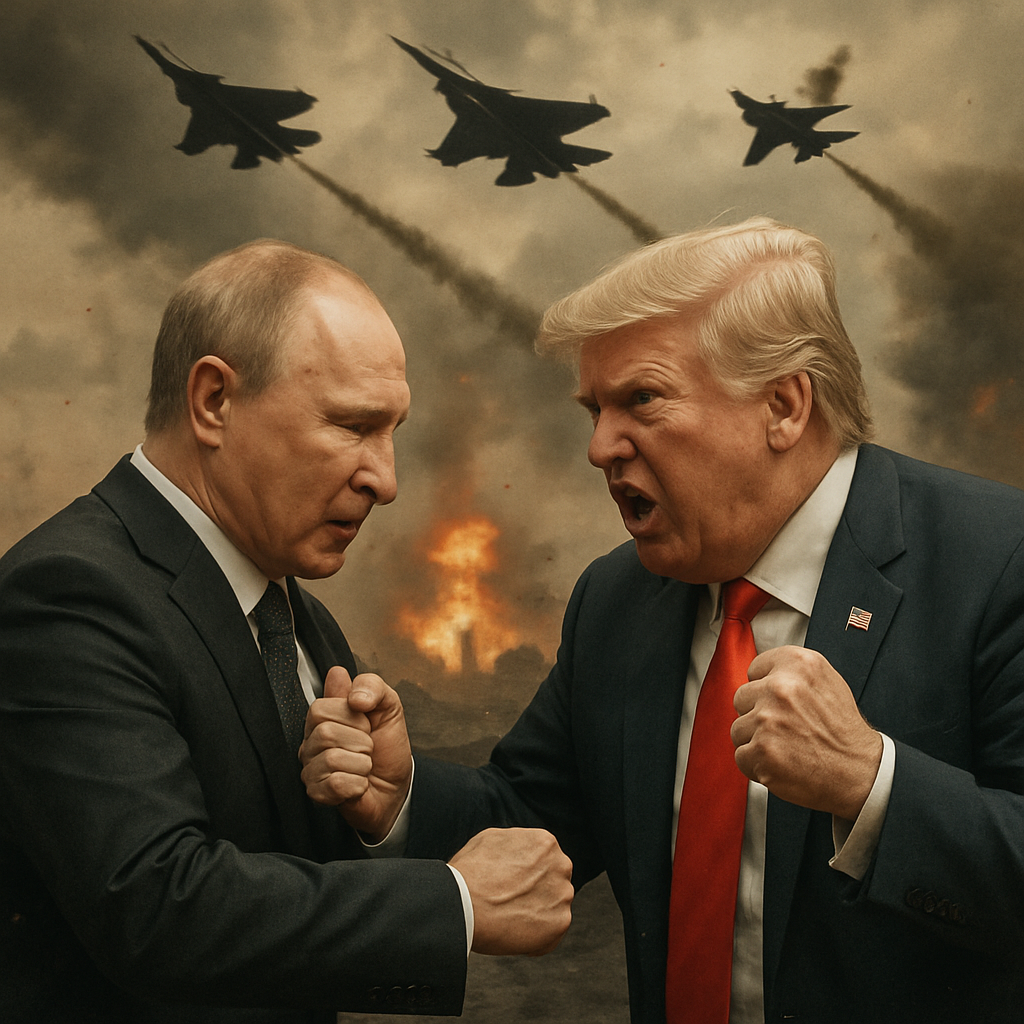